<a href="https://colab.research.google.com/github/HDS07/Deep_Learning/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
print("LOADING YOLO")
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")


LOADING YOLO


In [ ]:
classes = []
with open("coco.names", "r") as f:classes = [line.strip() for line in f.readlines()]


In [ ]:
layer_names = net.getLayerNames()

In [ ]:
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")


YOLO LOADED


Input Image:


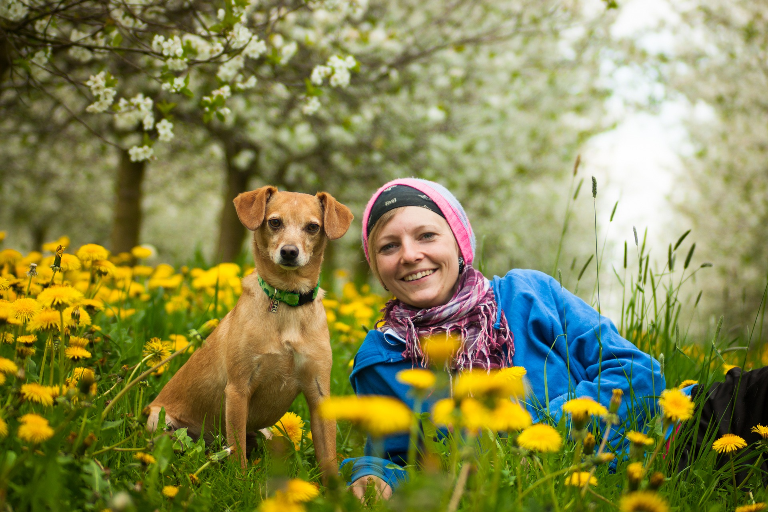

In [ ]:
img = cv2.imread("/content/random2.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("Input Image:")
cv2_imshow(img)


In [ ]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True,crop=False)


In [ ]:
net.setInput(blob)
outs = net.forward(output_layers)


In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.3:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.15, 0.8)


In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]





array([[[ 88, 111, 107],
        [ 70, 100,  97],
        [ 52,  91,  90],
        ...,
        [118, 162, 174],
        [126, 164, 176],
        [128, 163, 176]],

       [[ 79, 112, 109],
        [ 67, 103, 100],
        [ 51,  93,  93],
        ...,
        [118, 162, 173],
        [121, 162, 174],
        [125, 163, 175]],

       [[ 69, 109, 107],
        [ 64, 104, 104],
        [ 51,  93,  96],
        ...,
        [119, 164, 175],
        [118, 162, 173],
        [121, 163, 175]],

       ...,

       [[ 14,  60,  65],
        [ 11,  59,  63],
        [  9,  56,  60],
        ...,
        [  0,  82,  70],
        [  1,  91,  71],
        [  2,  97,  72]],

       [[ 12,  55,  64],
        [  9,  58,  63],
        [  6,  56,  58],
        ...,
        [  4,  81,  63],
        [ 10,  95,  75],
        [ 16, 112,  90]],

       [[  7,  53,  62],
        [  9,  62,  69],
        [ 11,  66,  69],
        ...,
        [  0,  80,  58],
        [  2,  76,  57],
        [  0,  65,  49]]], dtype=uint8)
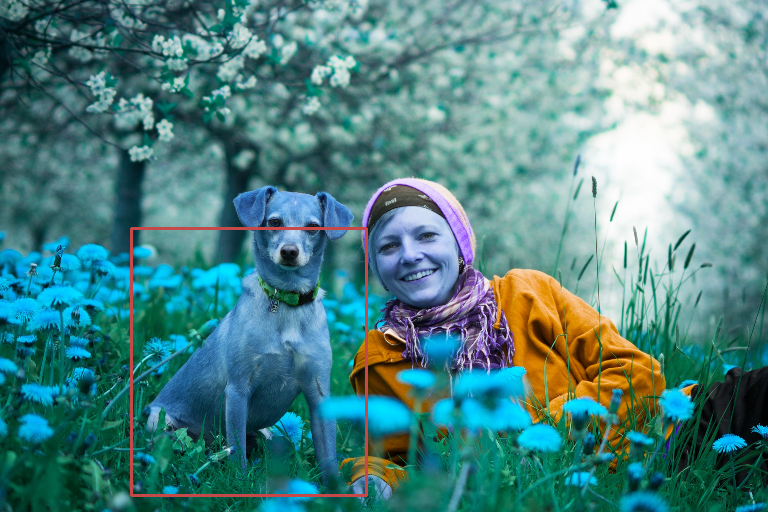

In [ ]:
cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

In [ ]:
cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x},  {w}, {h}")

Detected object: dog, confidence: 0.32145556807518005, box: 131,  235, 267


Output Image:


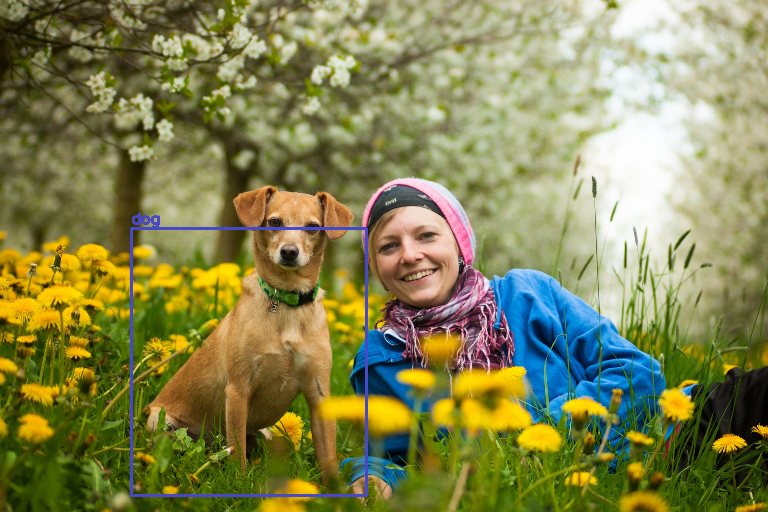

In [ ]:
print("Output Image:")
cv2_imshow(img)